# Taxi Data Model
This is a basic prototype notebook for fitting a model to predict taxi fares.

In [1]:
# Import required libraries

import argparse
from pathlib import Path
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import mlflow
import mlflow.sklearn

## Read in data

In [2]:
data = pd.read_csv('../../data/taxi-data.csv')

In [3]:
# define column types

TARGET_COL = "cost"

NUMERIC_COLS = [
    "distance",
    "dropoff_latitude",
    "dropoff_longitude",
    "passengers",
    "pickup_latitude",
    "pickup_longitude",
    "pickup_weekday",
    "pickup_month",
    "pickup_monthday",
    "pickup_hour",
    "pickup_minute",
    "pickup_second",
    "dropoff_weekday",
    "dropoff_month",
    "dropoff_monthday",
    "dropoff_hour",
    "dropoff_minute",
    "dropoff_second",
]

CAT_NOM_COLS = [
    "store_forward",
    "vendor",
]

CAT_ORD_COLS = [
]

In [4]:
data = data[NUMERIC_COLS + CAT_NOM_COLS + CAT_ORD_COLS + [TARGET_COL]]

## Split data
Splitting into Train 80 / Test 20 

In [5]:
random_data = np.random.rand(len(data))

msk_train = random_data < 0.8
msk_test = random_data >= 0.8

train = data[msk_train]
test = data[msk_test]

# Split the data into input(X) and output(y)
Y_train = train[TARGET_COL]
X_train = train[NUMERIC_COLS + CAT_NOM_COLS + CAT_ORD_COLS]

# Split the data into inputs and outputs
Y_test = test[TARGET_COL]
X_test = test[NUMERIC_COLS + CAT_NOM_COLS + CAT_ORD_COLS]

## Train Model
Using a Random Forest Regression Model

In [6]:
model = RandomForestRegressor(n_estimators = 500,
                              bootstrap = 1,
                              max_depth = 10,
                              max_features = 1.0,
                              min_samples_leaf = 4,
                              min_samples_split = 5,
                              random_state=0)

In [7]:
# Train model with the train set
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=1, max_depth=10, max_features=1.0,
                      min_samples_leaf=4, min_samples_split=5, n_estimators=500,
                      random_state=0)

# Evaluation 

### On Test data

In [8]:
predictions_test = model.predict(X_test)

In [9]:
# Evaluate Regression performance with the test set
r2 = r2_score(Y_test, predictions_test)
mse = mean_squared_error(Y_test, predictions_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, predictions_test)

In [10]:
r2, mse, rmse, mae

(0.9060347586246326, 8.4559487283264, 2.907911403108148, 1.3597100091920689)

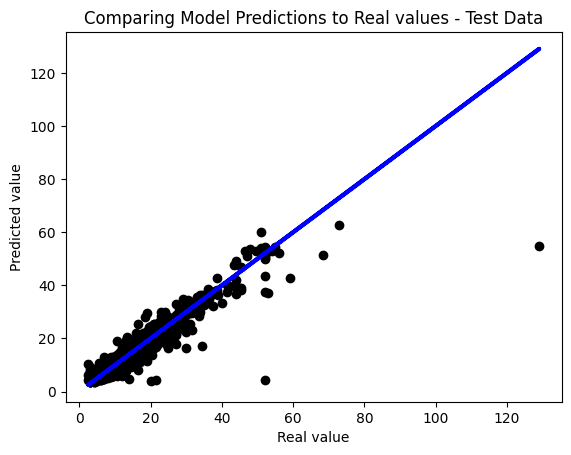

In [11]:
# Visualize results
plt.scatter(Y_test, predictions_test,  color='black')
plt.plot(test[TARGET_COL].values, test[TARGET_COL].values, color='blue', linewidth=3)
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.title("Comparing Model Predictions to Real values - Test Data")
plt.savefig("predictions.png")